In [35]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import json
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [36]:
df = pd.read_json('https://node-api.flipsidecrypto.com/api/v2/queries/1169aa2c-eb7e-4929-820b-a554e671b2da/data/latest')
df.head()

,SOLD_TIME,TOKEN,HOUR_DIFFERENCE,PLATFORM_NAME,BUYER,SELLER,MINT_FEE,Sell Price,Mint Price,Price Difference,Total Profit,# of Bids,# of Unique Bidders,CREATOR_FEE,PLATFORM_FEE,BACKGROUND,BODY,ACCESSORY,HEAD,GLASSES
0,2022-06-21 09:21:58,2304,1,opensea,0x5414d08228b4dbc4e9193ecd1ad97225dfe8ebfe,0xe9e22158a743aae5325184a94d4382d7b20102bb,0.012014,0.44800,0.36,0.08800,0.064786,11,6,0.011200,0.0,1,25,117,95,12
1,2022-06-20 20:41:18,2259,17,opensea,0x7a7f59056dc2d5116e07e0fbaf6a71bd77b326af,0x9cc718434e2a50a4693c270e36bd0a37d8f953d7,0.005562,0.44990,0.35,0.09990,0.083090,7,5,0.011247,0.0,0,28,87,219,4
2,2022-06-20 01:35:12,2247,3,opensea,0xe2689d951b7ae0f54a1f3279776263d1468ce362,0x8cfd874a688b73f3f5efb710f3738b5b1f32fe6b,0.021087,0.51499,0.37,0.14499,0.111028,8,5,0.012875,0.0,1,29,67,133,6
3,2022-06-19 09:39:33,2208,9,opensea,0x0d107291c0b5c7b63df3d811734bb41970bd219f,0x9cc718434e2a50a4693c270e36bd0a37d8f953d7,0.007236,0.48990,0.35,0.13990,0.120416,3,3,0.012247,0.0,0,1,129,69,18
4,2022-06-18 22:44:26,2196,7,opensea,0x513bbdea6b389ff26a1f3e9abbdde33f12d87b8d,0x811d6716cc21d94bb20cb752d8ec618ffc1ccfa5,0.012422,0.49900,0.48,0.01900,-0.005897,8,7,0.012475,0.0,0,12,131,228,6


In [37]:
df['DAY_OF_WEEK'] = df['SOLD_TIME'].dt.day_name()
df['HOUR'] = df['SOLD_TIME'].dt.hour

def custom_round(x, base=15):
    x = x.minute
    return int(base * round(float(x)/base))

df['FIFTEEN'] = df['SOLD_TIME'].apply(lambda x: custom_round(x, base=15))

In [38]:
df


,SOLD_TIME,TOKEN,HOUR_DIFFERENCE,PLATFORM_NAME,BUYER,SELLER,MINT_FEE,Sell Price,Mint Price,Price Difference,...,CREATOR_FEE,PLATFORM_FEE,BACKGROUND,BODY,ACCESSORY,HEAD,GLASSES,DAY_OF_WEEK,HOUR,FIFTEEN
0,2022-06-21 09:21:58,2304,1,opensea,0x5414d08228b4dbc4e9193ecd1ad97225dfe8ebfe,0xe9e22158a743aae5325184a94d4382d7b20102bb,0.012014,0.44800,0.36,0.08800,...,1.120000e-02,0.000000,1,25,117,95,12,Tuesday,9,15
1,2022-06-20 20:41:18,2259,17,opensea,0x7a7f59056dc2d5116e07e0fbaf6a71bd77b326af,0x9cc718434e2a50a4693c270e36bd0a37d8f953d7,0.005562,0.44990,0.35,0.09990,...,1.124750e-02,0.000000,0,28,87,219,4,Monday,20,45
2,2022-06-20 01:35:12,2247,3,opensea,0xe2689d951b7ae0f54a1f3279776263d1468ce362,0x8cfd874a688b73f3f5efb710f3738b5b1f32fe6b,0.021087,0.51499,0.37,0.14499,...,1.287475e-02,0.000000,1,29,67,133,6,Monday,1,30
3,2022-06-19 09:39:33,2208,9,opensea,0x0d107291c0b5c7b63df3d811734bb41970bd219f,0x9cc718434e2a50a4693c270e36bd0a37d8f953d7,0.007236,0.48990,0.35,0.13990,...,1.224750e-02,0.000000,0,1,129,69,18,Sunday,9,45
4,2022-06-18 22:44:26,2196,7,opensea,0x513bbdea6b389ff26a1f3e9abbdde33f12d87b8d,0x811d6716cc21d94bb20cb752d8ec618ffc1ccfa5,0.012422,0.49900,0.48,0.01900,...,1.247500e-02,0.000000,0,12,131,228,6,Saturday,22,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,2022-05-15 04:41:30,133,22,x2y2,0x2d50bf6334152dbda8bed2f50e5a0d8456bd47b3,0xb71c7a2827aa66a83413a5397003c5b0d2a2b4a5,0.011422,1.00000,0.34,0.66000,...,0.000000e+00,0.005000,0,13,87,180,19,Sunday,4,45
132,2022-05-15 04:41:30,139,20,opensea,0x2d50bf6334152dbda8bed2f50e5a0d8456bd47b3,0x23f7c433b0ddd51e328106b7529a15c315d332a1,0.012675,0.99000,0.10,0.89000,...,0.000000e+00,0.024750,0,26,38,158,0,Sunday,4,45
133,2022-05-15 04:41:30,132,23,opensea,0x2d50bf6334152dbda8bed2f50e5a0d8456bd47b3,0xbd654f582f787e49df8e5ef4fe1ef2646e9c99cb,0.021521,1.00000,0.35,0.65000,...,0.000000e+00,0.025000,1,9,4,47,20,Sunday,4,45
134,2022-05-15 04:41:30,127,24,opensea,0x2d50bf6334152dbda8bed2f50e5a0d8456bd47b3,0xbd654f582f787e49df8e5ef4fe1ef2646e9c99cb,0.016178,1.00000,0.30,0.70000,...,0.000000e+00,0.025000,1,0,132,58,10,Sunday,4,45


In [39]:
df

,SOLD_TIME,TOKEN,HOUR_DIFFERENCE,PLATFORM_NAME,BUYER,SELLER,MINT_FEE,Sell Price,Mint Price,Price Difference,...,CREATOR_FEE,PLATFORM_FEE,BACKGROUND,BODY,ACCESSORY,HEAD,GLASSES,DAY_OF_WEEK,HOUR,FIFTEEN
0,2022-06-21 09:21:58,2304,1,opensea,0x5414d08228b4dbc4e9193ecd1ad97225dfe8ebfe,0xe9e22158a743aae5325184a94d4382d7b20102bb,0.012014,0.44800,0.36,0.08800,...,1.120000e-02,0.000000,1,25,117,95,12,Tuesday,9,15
1,2022-06-20 20:41:18,2259,17,opensea,0x7a7f59056dc2d5116e07e0fbaf6a71bd77b326af,0x9cc718434e2a50a4693c270e36bd0a37d8f953d7,0.005562,0.44990,0.35,0.09990,...,1.124750e-02,0.000000,0,28,87,219,4,Monday,20,45
2,2022-06-20 01:35:12,2247,3,opensea,0xe2689d951b7ae0f54a1f3279776263d1468ce362,0x8cfd874a688b73f3f5efb710f3738b5b1f32fe6b,0.021087,0.51499,0.37,0.14499,...,1.287475e-02,0.000000,1,29,67,133,6,Monday,1,30
3,2022-06-19 09:39:33,2208,9,opensea,0x0d107291c0b5c7b63df3d811734bb41970bd219f,0x9cc718434e2a50a4693c270e36bd0a37d8f953d7,0.007236,0.48990,0.35,0.13990,...,1.224750e-02,0.000000,0,1,129,69,18,Sunday,9,45
4,2022-06-18 22:44:26,2196,7,opensea,0x513bbdea6b389ff26a1f3e9abbdde33f12d87b8d,0x811d6716cc21d94bb20cb752d8ec618ffc1ccfa5,0.012422,0.49900,0.48,0.01900,...,1.247500e-02,0.000000,0,12,131,228,6,Saturday,22,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,2022-05-15 04:41:30,133,22,x2y2,0x2d50bf6334152dbda8bed2f50e5a0d8456bd47b3,0xb71c7a2827aa66a83413a5397003c5b0d2a2b4a5,0.011422,1.00000,0.34,0.66000,...,0.000000e+00,0.005000,0,13,87,180,19,Sunday,4,45
132,2022-05-15 04:41:30,139,20,opensea,0x2d50bf6334152dbda8bed2f50e5a0d8456bd47b3,0x23f7c433b0ddd51e328106b7529a15c315d332a1,0.012675,0.99000,0.10,0.89000,...,0.000000e+00,0.024750,0,26,38,158,0,Sunday,4,45
133,2022-05-15 04:41:30,132,23,opensea,0x2d50bf6334152dbda8bed2f50e5a0d8456bd47b3,0xbd654f582f787e49df8e5ef4fe1ef2646e9c99cb,0.021521,1.00000,0.35,0.65000,...,0.000000e+00,0.025000,1,9,4,47,20,Sunday,4,45
134,2022-05-15 04:41:30,127,24,opensea,0x2d50bf6334152dbda8bed2f50e5a0d8456bd47b3,0xbd654f582f787e49df8e5ef4fe1ef2646e9c99cb,0.016178,1.00000,0.30,0.70000,...,0.000000e+00,0.025000,1,0,132,58,10,Sunday,4,45


In [40]:
def one_hot_encode(df, col):
    enc = OneHotEncoder()
    enc.fit(df[col].values.reshape(-1,1))
    transformed = (enc.transform(df[col].values.reshape(-1,1))).toarray()
    df_feature = pd.DataFrame(transformed, columns =enc.get_feature_names())
    df_feature = df_feature.add_suffix('_' + col)
    df = pd.concat([df,df_feature], axis = 1).drop([col], axis = 1)
    return df 
                   
df_prep = df.copy(deep = True)
df_prep = df_prep.fillna(0)
cat_cols = ['DAY_OF_WEEK','BACKGROUND','BODY','ACCESSORY','HEAD','GLASSES','PLATFORM_NAME','BUYER','SELLER']
for col in cat_cols: 
    df_prep = one_hot_encode(df_prep, col)


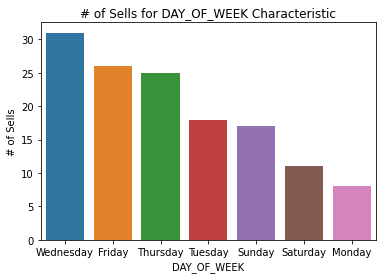

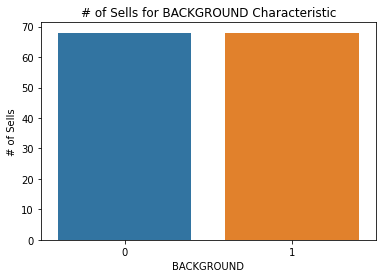

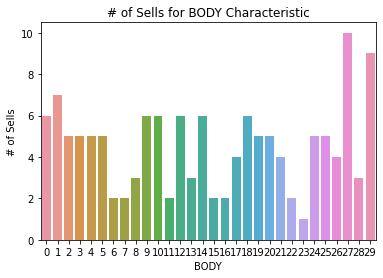

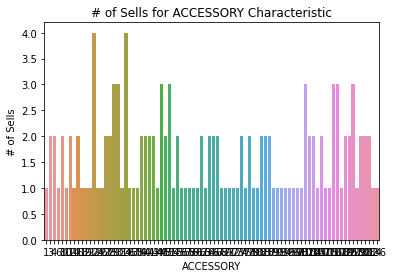

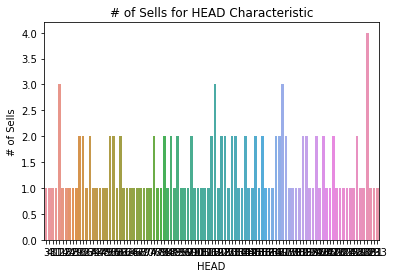

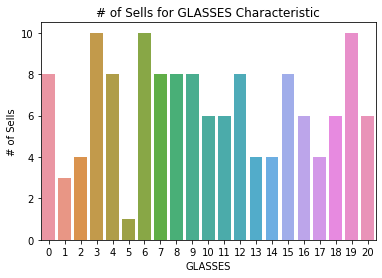

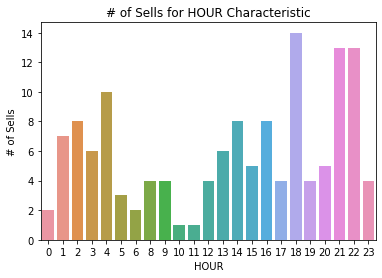

In [41]:
categories = ['DAY_OF_WEEK','BACKGROUND','BODY','ACCESSORY','HEAD','GLASSES','HOUR']
for cat in categories:
    df_cat = pd.DataFrame(df.groupby(cat)['TOKEN'].count().sort_values(ascending = False).reset_index())
    plt.figure()
    plt.title('# of Sells for ' + cat + ' Characteristic')
    sns.barplot(x = cat,y='TOKEN',data = df_cat)
    plt.ylabel('# of Sells')




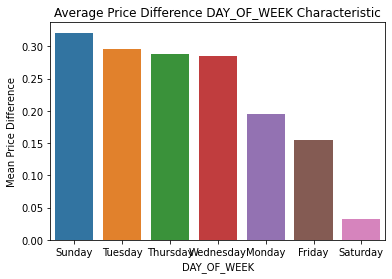

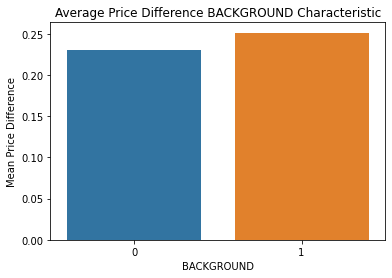

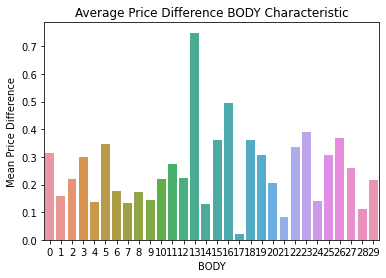

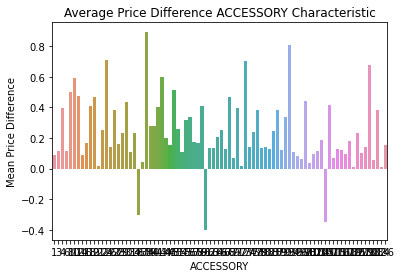

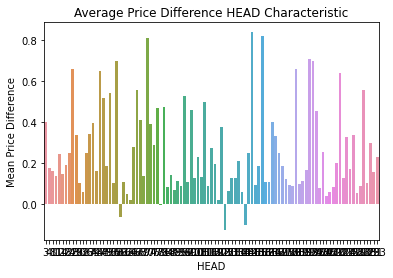

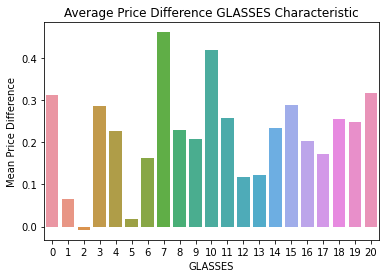

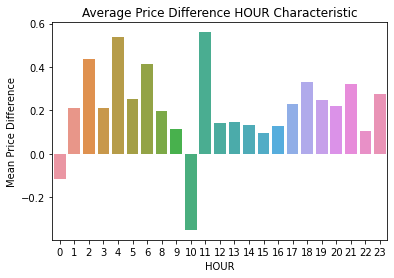

In [42]:
#Average Price Diff
for cat in categories:
    df_cat = pd.DataFrame(df.groupby(cat)['Price Difference'].mean().sort_values(ascending = False).reset_index())
    plt.figure()
    plt.title('Average Price Difference ' + cat + ' Characteristic')
    sns.barplot(x = cat,y= 'Price Difference',data = df_cat)
    plt.ylabel('Mean Price Difference')

In [43]:
scaler = MinMaxScaler()
#df_prep['SOLD_TIME'] = df_prep['SOLD_TIME'].apply(lambda x: x.value)
num_columns = ['SOLD_TIME','TOKEN','# of Bids','# of Unique Bidders','Mint Price']
for col in num_columns:
    df_prep[col] =scaler.fit_transform(df_prep[col].values.reshape(-1,1))

In [44]:
X = df_prep.iloc[:,3:]

In [45]:
df_prep

,SOLD_TIME,TOKEN,HOUR_DIFFERENCE,MINT_FEE,Sell Price,Mint Price,Price Difference,Total Profit,# of Bids,# of Unique Bidders,...,x0_0xea414355a738d5715379db885db889049c20fc92_SELLER,x0_0xef6c1456a2467c9016a443812d0c182706fdf722_SELLER,x0_0xf030826369df88d769b3640bfa937b0c273a3bda_SELLER,x0_0xf054274dd74987395d28136e53f39ef4f7b19994_SELLER,x0_0xf24e32145ce5f4f9f03b9ef4b9fc4d817e2fa20c_SELLER,x0_0xf2c4bcf2596a8d8a50db62758388fbf67ba698e3_SELLER,x0_0xf3dc6409306ac31eaa54c4ea120ce23d827895f0_SELLER,x0_0xfc538ffd2923dddaed09c8ad1a51686275c56183_SELLER,x0_0xfcdd256267ade068babfb94f526a47aadf143a55_SELLER,x0_0xff2425ce08959e57e3d5aa3fc9f1c79894b0dcc3_SELLER
0,1.000000,1.000000,1,0.012014,0.44800,0.150289,0.08800,0.064786,0.588235,0.384615,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.986983,0.980315,17,0.005562,0.44990,0.144509,0.09990,0.083090,0.352941,0.307692,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.967371,0.975066,3,0.021087,0.51499,0.156069,0.14499,0.111028,0.411765,0.307692,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.951018,0.958005,9,0.007236,0.48990,0.144509,0.13990,0.120416,0.117647,0.153846,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.939807,0.952756,7,0.012422,0.49900,0.219653,0.01900,-0.005897,0.411765,0.461538,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,0.083463,0.050306,22,0.011422,1.00000,0.138728,0.66000,0.643578,0.294118,0.230769,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
132,0.083463,0.052931,20,0.012675,0.99000,0.000000,0.89000,0.852575,0.176471,0.153846,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
133,0.083463,0.049869,23,0.021521,1.00000,0.144509,0.65000,0.603479,0.470588,0.307692,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
134,0.083463,0.047682,24,0.016178,1.00000,0.115607,0.70000,0.658822,0.470588,0.384615,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
y = df['Sell Price']
y2 = df['Price Difference']
y3 = df['Total Profit'].apply(lambda x:1 if x > 0.1 else 0)
x = df_prep.drop(['Price Difference',
'Sell Price',
'Total Profit','PLATFORM_FEE'],axis = 1)


In [47]:
rf = RandomForestRegressor()
x_train, x_test, y_train, y_test = train_test_split(x, y ,test_size = .3)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
print("RMSE: %.2f" % np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE: 0.16


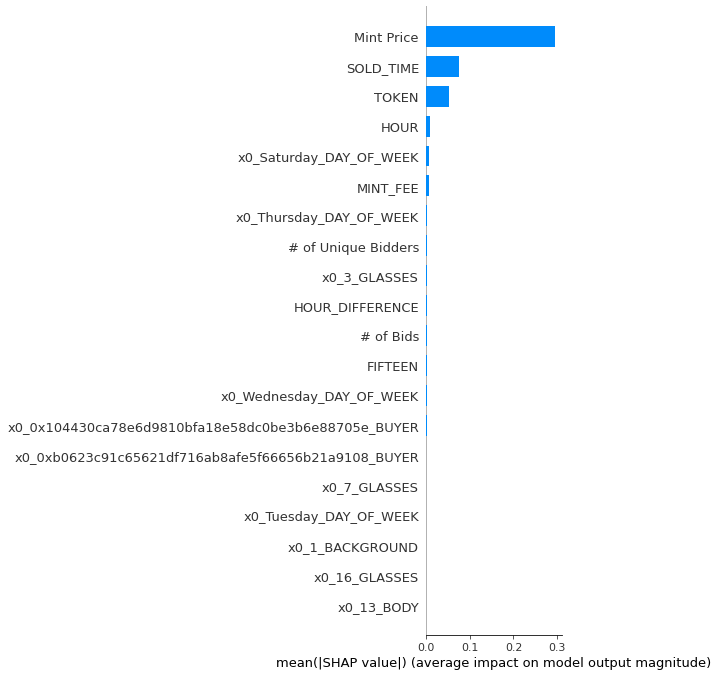

In [48]:
import shap
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(x_test)
shap.summary_plot(shap_values, x_test, plot_type="bar")

In [49]:
rf2 = RandomForestRegressor()
x = x.drop(['SOLD_TIME','HOUR_DIFFERENCE','# of Bids','# of Unique Bidders','CREATOR_FEE'],axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y2,test_size = .4)
rf2.fit(x_train,y_train)
y_pred = rf2.predict(x_test)
print("RMSE: %.2f" % np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE: 0.21


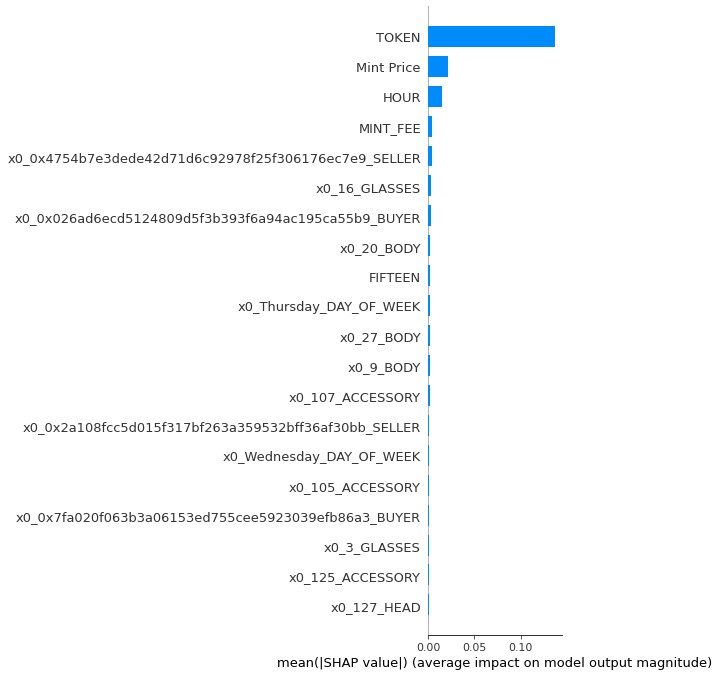

In [50]:
import shap
explainer = shap.TreeExplainer(rf2)
shap_values = explainer.shap_values(x_test)
shap.summary_plot(shap_values, x_test, plot_type="bar")